# 预训练语义分割模型预测-单张图像-Python API

同济子豪兄：https://space.bilibili.com/1900783

2022-1-11 2023-8-16

## 进入 mmsegmentation 主目录

In [1]:
import os
os.chdir('mmsegmentation')

## 导入工具包

In [2]:
import numpy as np
import cv2

from mmseg.apis import init_model, inference_model, show_result_pyplot
import mmcv

import matplotlib.pyplot as plt
%matplotlib inline

## 载入模型

In [3]:
# 模型 config 配置文件
config_file = 'configs/segformer/segformer_mit-b5_8xb1-160k_cityscapes-1024x1024.py'

# 模型 checkpoint 权重文件
checkpoint_file = 'https://download.openmmlab.com/mmsegmentation/v0.5/segformer/segformer_mit-b5_8x1_1024x1024_160k_cityscapes/segformer_mit-b5_8x1_1024x1024_160k_cityscapes_20211206_072934-87a052ec.pth'


In [4]:
model = init_model(config_file, checkpoint_file, device='cuda:0')

/home/featurize/work/MMSegmentation教程20230625/0816录制视频/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/home/featurize/work/MMSegmentation教程20230625/0816录制视频/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:236: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  'Default ``avg_non_ignore`` is False, if you would like to '


Loads checkpoint by http backend from path: https://download.openmmlab.com/mmsegmentation/v0.5/segformer/segformer_mit-b5_8x1_1024x1024_160k_cityscapes/segformer_mit-b5_8x1_1024x1024_160k_cityscapes_20211206_072934-87a052ec.pth


## 载入测试图像

In [5]:
img_path = 'data/street_uk.jpeg'

In [6]:
img_bgr = cv2.imread(img_path)

In [7]:
img_bgr.shape

(1500, 2250, 3)

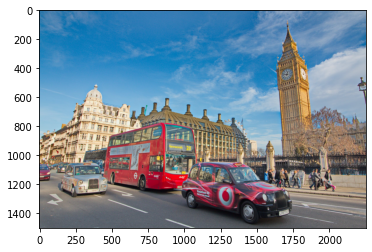

In [8]:
plt.imshow(img_bgr[:,:,::-1])
plt.show()

## 语义分割推理预测

In [9]:
result = inference_model(model, img_bgr)

In [11]:
# result

In [12]:
result.keys()

['seg_logits', 'pred_sem_seg']

## 语义分割预测结果-定性类别

In [13]:
# 类别：0-18，共 19 个 类别
result.pred_sem_seg.data.shape

torch.Size([1, 1500, 2250])

In [14]:
np.unique(result.pred_sem_seg.data.cpu())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 13, 15])

In [15]:
result.pred_sem_seg.data.shape

torch.Size([1, 1500, 2250])

In [16]:
result.pred_sem_seg.data

tensor([[[10, 10, 10,  ..., 10, 10, 10],
         [10, 10, 10,  ..., 10, 10, 10],
         [10, 10, 10,  ..., 10, 10, 10],
         ...,
         [ 0,  0,  0,  ...,  0,  0,  0],
         [ 0,  0,  0,  ...,  0,  0,  0],
         [ 0,  0,  0,  ...,  0,  0,  0]]], device='cuda:0')

In [17]:
pred_mask = result.pred_sem_seg.data[0].detach().cpu().numpy()

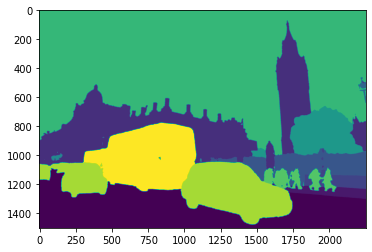

In [19]:
plt.imshow(pred_mask)
plt.show()

## 语义分割预测结果-定量置信度

In [20]:
# 置信度
result.seg_logits.data.shape

torch.Size([19, 1500, 2250])

## 可视化语义分割预测结果-方法一

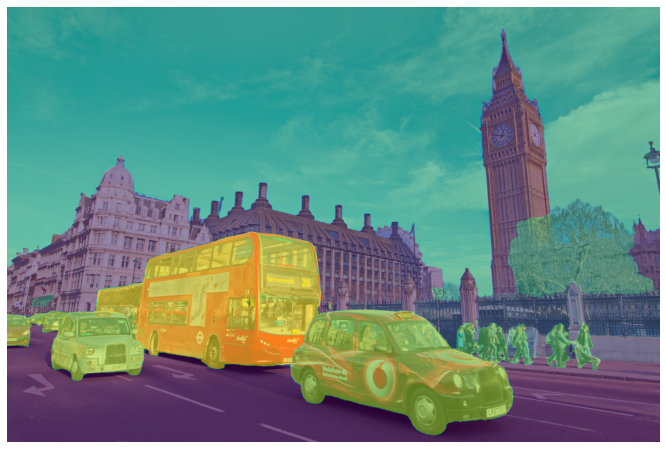

In [24]:
plt.figure(figsize=(14, 8))
plt.imshow(img_bgr[:,:,::-1])
plt.imshow(pred_mask, alpha=0.55) # alpha 高亮区域透明度，越小越接近原图
plt.axis('off')
plt.savefig('outputs/B2-1.jpg')
plt.show()

## 可视化语义分割预测结果-方法二（和原图并排显示）

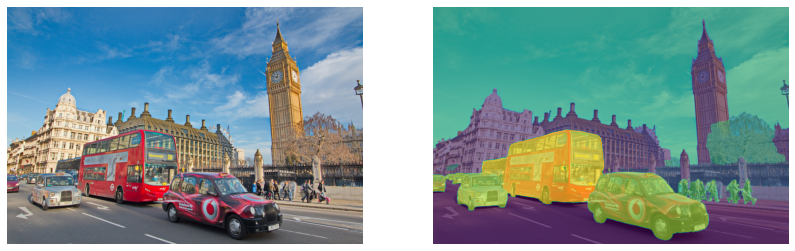

In [25]:
plt.figure(figsize=(14, 8))

plt.subplot(1,2,1)
plt.imshow(img_bgr[:,:,::-1])
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_bgr[:,:,::-1])
plt.imshow(pred_mask, alpha=0.6) # alpha 高亮区域透明度，越小越接近原图
plt.axis('off')
plt.savefig('outputs/B2-2.jpg')
plt.show()

## 可视化语义分割预测结果-方法三

按照`mmseg/datasets/cityscapes.py`定义的配色方案

In [26]:
from mmseg.apis import show_result_pyplot

In [27]:
img_viz = show_result_pyplot(model, img_path, result, opacity=0.8, title='MMSeg', out_file='outputs/B2-3.jpg')

/environment/miniconda3/lib/python3.7/site-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


opacity控制透明度，越小，越接近原图。

In [28]:
img_viz.shape

(1500, 2250, 3)

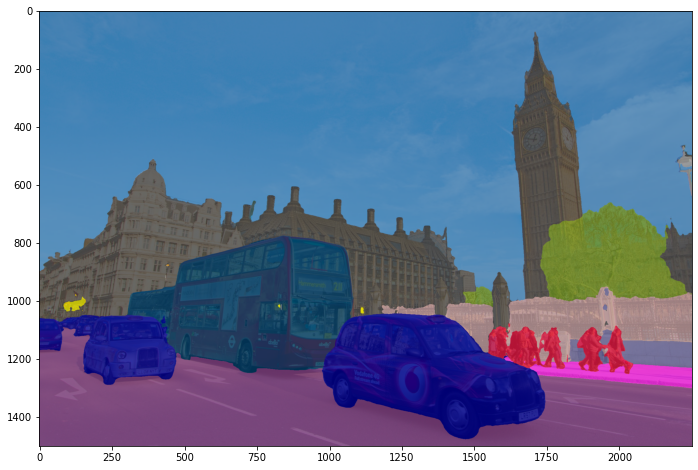

In [33]:
plt.figure(figsize=(14, 8))
plt.imshow(img_viz)
plt.show()

## 可视化语义分割预测结果-方法四（加图例）

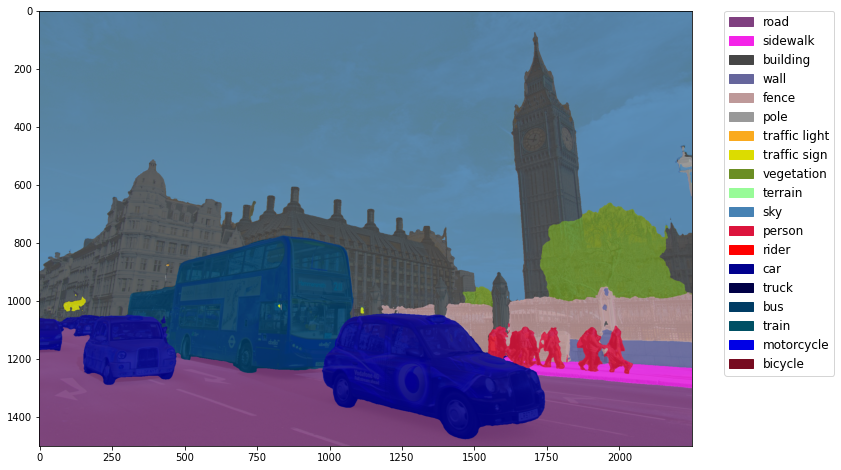

In [32]:
from mmseg.datasets import cityscapes
import numpy as np
import mmcv 
from PIL import Image

# 获取类别名和调色板
classes = cityscapes.CityscapesDataset.METAINFO['classes']
palette = cityscapes.CityscapesDataset.METAINFO['palette']
opacity = 0.15 # 透明度，越大越接近原图

# 将分割图按调色板染色
# seg_map = result[0].astype('uint8')
seg_map = pred_mask.astype('uint8')
seg_img = Image.fromarray(seg_map).convert('P')
seg_img.putpalette(np.array(palette, dtype=np.uint8))

from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
plt.figure(figsize=(14, 8))
im = plt.imshow(((np.array(seg_img.convert('RGB')))*(1-opacity) + mmcv.imread(img_path)*opacity) / 255)

# 为每一种颜色创建一个图例
patches = [mpatches.Patch(color=np.array(palette[i])/255., label=classes[i]) for i in range(len(classes))]
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize='large')

plt.savefig('outputs/B2-4.jpg')
plt.show()